In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV, Lasso
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('df_all_quant.csv')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head(5)

,genre,name,platform,ratings,release_date,total_sales,time_delta,year,month,Rank,Publisher,log_total_sales,games_by_publisher,total_sales_by_publisher,total_games_by_genre,publisher_Quartile(total_sales)
0,Action,Saints Row 2,X360,M,2008-10-14,3.07,3653,2008,10,462.0,THQ,1.403643,74,59.13,342,75%_Publisher
1,Action,Rugrats in Paris: The Movie,PS,E,2000-10-29,3.52,6560,2000,10,368.0,THQ,1.508512,74,59.13,342,75%_Publisher
2,Action,Dynasty Warriors 3,PS2,T,2001-11-26,1.87,6167,2001,11,923.0,THQ,1.054312,74,59.13,342,75%_Publisher
3,Action,Saints Row 2,PS3,M,2008-10-14,1.68,3653,2008,10,462.0,THQ,0.985817,74,59.13,342,75%_Publisher
4,Action,The Incredibles,GBA,E,2004-10-31,2.06,5097,2004,10,668.0,THQ,1.118415,74,59.13,342,75%_Publisher


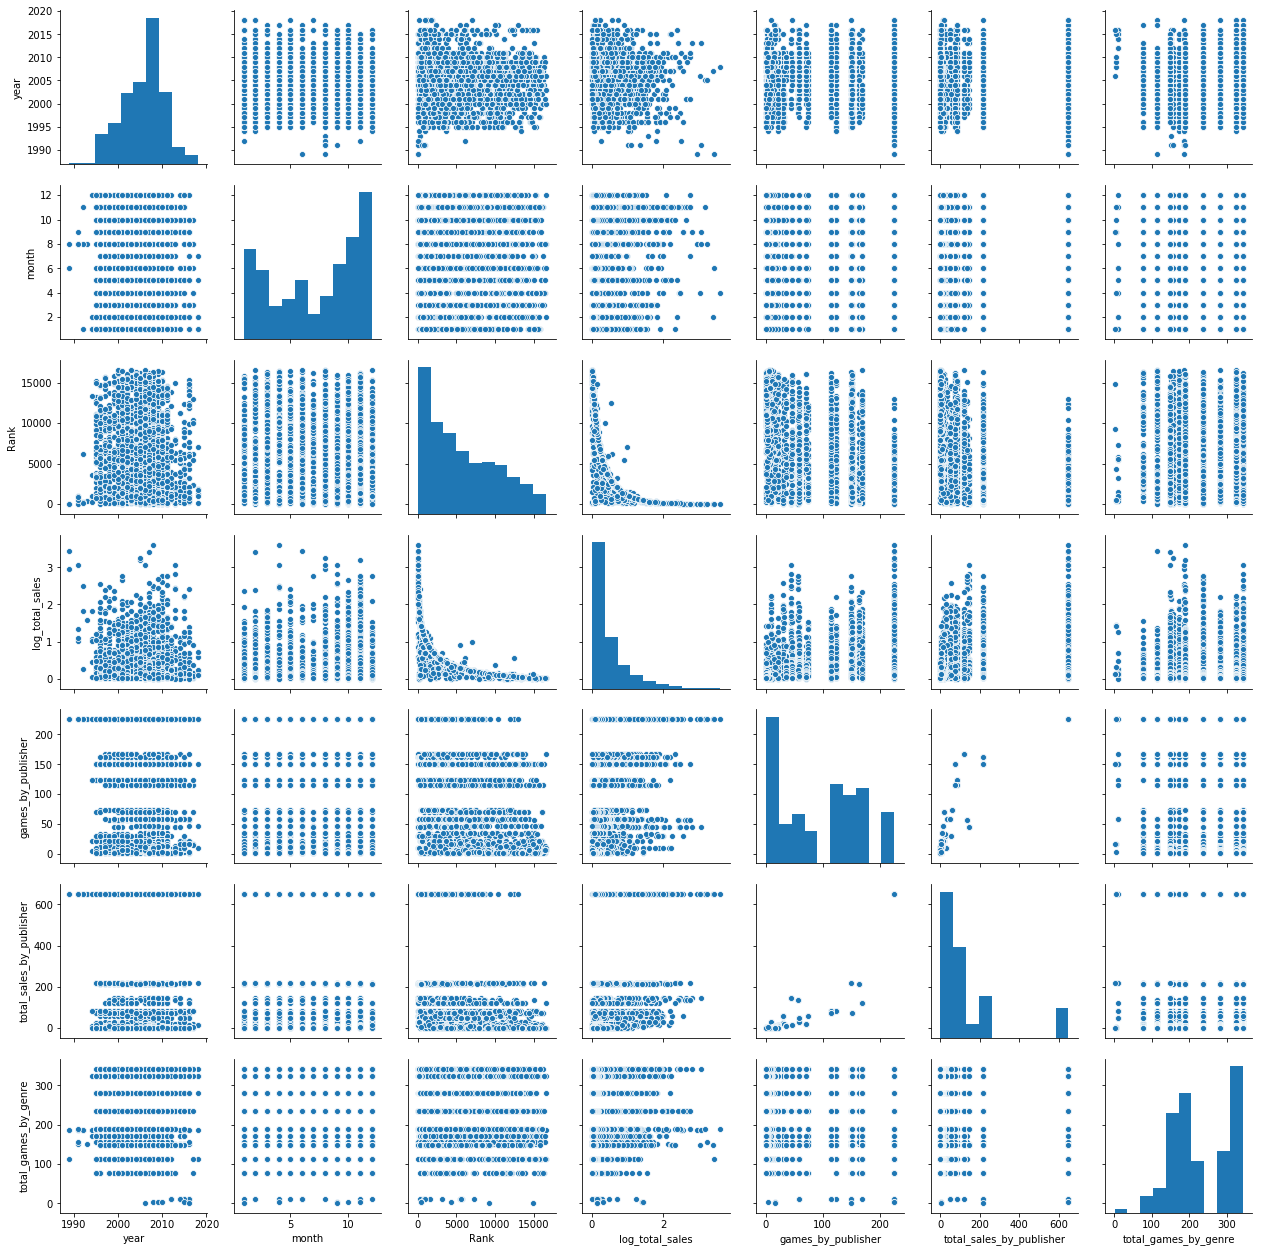

In [5]:
# analyze features
features1 = df.drop(columns=['time_delta', 'total_sales', 'ratings'])
features = list(features1.describe().columns)
sns.pairplot(data=df, vars=features)

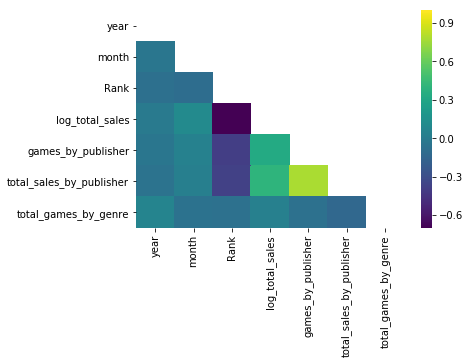

In [6]:
mask = np.triu(np.array(np.ones(df[features].corr().shape)))
#plot a hitmap
sns.heatmap(df[features].corr(), cmap='viridis', mask=mask)
# rank and log_total_sales has a high negative correlation
#this happens because the lower the rank number, the higher the sales volume

In [7]:
# Transform categorical features into values
gm = pd.get_dummies(df[['genre','platform','ratings','time_delta','year', 'month','Rank', 'Publisher', 'games_by_publisher', 'total_sales_by_publisher', 'total_games_by_genre', 'publisher_Quartile(total_sales)']]) #can just apply it to the whole df
gm['target'] = df['log_total_sales']
# gm['time_delta'] = df['time_delta']

In [8]:
X = gm.drop(columns='target')
y = gm['target']

In [9]:
from sklearn.model_selection import train_test_split
# hold out 20% of the data for final testing
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=.2, 
                                        random_state=42)
# divide the data again, train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, 
                                        random_state=42)

In [10]:
#Linear
from sklearn.linear_model import LinearRegression

# create a regression object
lm = LinearRegression()
# train the model using the training sets
lm_fit = lm.fit(X_train,y_train)

# R2/score
train_score_linear = lm.score(X_train,y_train)
test_score_linear = lm.score(X_test,y_test)
train_score_linear, test_score_linear

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(0.6045833850757771, 0.5015142981715988)

In [11]:
# Standidize scale
std = StandardScaler()
std.fit(X_train)

# Apply scaler to train set
X_tr = std.transform(X_train)

# Apply the scaler to test set
X_te = std.transform(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [12]:
#lasso
#dividing non-test dataset into 5 and testing automatically
reg = LassoCV(cv=5, random_state=0).fit(X_tr, y_train)
train_score_lasso = reg.score(X_tr, y_train)
test_score_lasso = reg.score(X_te, y_test)
lassocv_alpha = reg.alpha_
train_score_lasso, test_score_lasso

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/pyth

(0.5878236002507178, 0.5270321378435064)

In [13]:
#Ridge
lm_ridge = RidgeCV(cv=5)
ridge_fit = lm_ridge.fit(X_tr, y_train)
train_score_ridge = ridge_fit.score(X_tr, y_train)
test_score_ridge = ridge_fit.score(X_te, y_test)
train_score_ridge, test_score_ridge

(0.6044229288078978, 0.4999617838413618)

In [14]:
#Polynomial

poly = PolynomialFeatures()

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_tr), y_train)
y_pred = lm_poly.predict(poly.transform(X_te))
print("Polynomial Regression:", r2_score(y_test, y_pred))

Polynomial Regression: -1.8911184840087554e+24


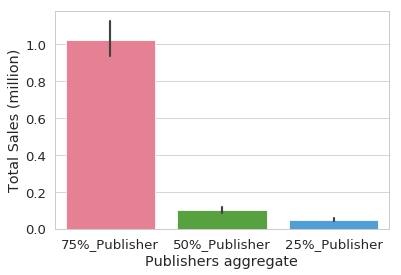

In [15]:
sns.set_style("whitegrid")
sns.set_context("paper",font_scale=1.5)
g = sns.barplot('publisher_Quartile(total_sales)','total_sales', data=df, palette="husl")
plt.xlabel('Publishers aggregate')
plt.ylabel('Total Sales (million)')
plt.savefig("heatmap_2st.png")

In [ ]:
# plt.savefig("Sales_Pub_Q.png") 